<div style="text-align: center; background-color: skyblue; font-family: 'Times New Roman', serif; color: white; padding: 20px; font-size: 36px; font-weight: bold; border-radius: 15px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    PROGRAMMING FOR DATA SCIENCE<br>
    @ FIT-HCMUS, VNU-HCM<br>
    FINAL PROJECT 🏫
</div>
<style>
    div:hover {
        transform: scale(1.05);
        box-shadow: 0px 10px 20px rgba(0, 0, 0, 0.3);
    }
</style>

<div style="text-align: center; background-color: #ADD8E6; font-family: 'Times New Roman', serif; color: white; padding: 25px; font-size: 20px; font-weight: bold; border-radius: 10px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    DATA ANALYTICS AND VISUALIZATION - PART 1
</div>
<style>
    div:hover {
        opacity: 0.8;
    }
</style>

---

### Cài đặt các thư viện cần thiết.

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

### Tải bộ dữ liệu.

In [2]:
# Tải dataset
data = pd.read_csv('../Datasets/processed-redwine-quality.csv')

# In ra một số mẫu dữ liệu
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1107,5.2,0.64,0.00,2.15,0.08,15.0,28.0,0.99,3.78,0.61,12.5,6
60,7.2,0.72,0.05,4.65,0.09,4.0,11.0,1.00,3.41,0.39,10.9,5
986,8.5,0.18,0.51,1.75,0.07,45.0,88.0,1.00,3.33,0.76,11.8,7
745,6.8,0.49,0.22,2.30,0.07,13.0,24.0,0.99,3.41,0.83,11.3,6
1123,9.1,0.76,0.68,1.70,0.41,18.0,64.0,1.00,2.90,1.33,9.1,6


### Kiểm tra thông tin của bộ dữ liệu

In [3]:
# Xem thông tin tổng quan của dữ liệu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 127.5 KB


In [4]:
# Xem thông tin thống kê của dữ liệu
data.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00
mean,8.31,0.53,0.27,2.52,0.09,15.89,46.83,1.00,3.31,0.66,10.43,5.62
std,1.74,0.18,0.20,1.35,0.05,10.45,33.41,0.00,0.16,0.17,1.08,0.82
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.43,2.60,0.09,21.00,63.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


### Phân tích mức độ tương quan giữa các thuộc tính trong bộ dữ liệu.

Tính toán và hiển thị ma trận tương quan để xác định các cặp thuộc tính có mối quan hệ chặt chẽ, phục vụ cho việc phân tích sâu hơn.

In [5]:
# Tính toán ma trận tương quan
correlation = data.corr()

# In ma trận tương quan
correlation.round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.26,0.67,0.11,0.08,-0.14,-0.10,0.35,-0.69,0.19,-0.06,0.12
volatile acidity,-0.26,1.00,-0.55,-0.00,0.06,-0.02,0.07,0.06,0.25,-0.26,-0.20,-0.40
citric acid,0.67,-0.55,1.00,0.14,0.21,-0.05,0.05,0.13,-0.55,0.33,0.11,0.23
residual sugar,0.11,-0.00,0.14,1.00,0.02,0.16,0.20,0.13,-0.08,-0.01,0.06,0.01
chlorides,0.08,0.06,0.21,0.02,1.00,-0.00,0.04,0.17,-0.27,0.39,-0.22,-0.13
free sulfur dioxide,-0.14,-0.02,-0.05,0.16,-0.00,1.00,0.67,-0.01,0.06,0.05,-0.08,-0.05
total sulfur dioxide,-0.10,0.07,0.05,0.20,0.04,0.67,1.00,0.07,-0.08,0.04,-0.22,-0.18
density,0.35,0.06,0.13,0.13,0.17,-0.01,0.07,1.00,-0.24,0.07,-0.53,-0.22
pH,-0.69,0.25,-0.55,-0.08,-0.27,0.06,-0.08,-0.24,1.00,-0.21,0.21,-0.06
sulphates,0.19,-0.26,0.33,-0.01,0.39,0.05,0.04,0.07,-0.21,1.00,0.09,0.25


- **Tương quan mạnh (|r| > 0.5):**
    - `fixed acidity` và `citric acid` (0.67)
    - `free sulfur dioxide` và `total sulfur dioxide` (0.67)
    - `pH` và `fixed acidity` (-0.69)
    - `pH` và `citric acid` (-0.55)
    - `density` và `alcohol` (-0.53)

- **Tương quan trung bình (0.1 < |r| ≤ 0.5):**
    - `alcohol` và `quality` (0.48)
    - `sulphates` và `quality` (0.25)
    - `volatile acidity` và `quality` (-0.40)

- **Không có mối liên hệ (|r| ≤ 0.1):**
    - `residual sugar` và `quality` (0.01)
    - `chlorides` và `quality` (-0.13)
    - `density` và `quality` (-0.22)

## Câu hỏi 1: Sulphates và tỉ lệ axit bay hơi (volatile acidity) có mối quan hệ như thế nào trong việc ảnh hưởng đến hương vị và chất lượng rượu vang?

### Mục đích của việc trả lời câu hỏi này
- **Sulphates trong rượu vang**: Là hợp chất ảnh hưởng đến vị rượu, giúp cân bằng độ axit và ổn định hương vị, đồng thời có vai trò trong việc bảo quản rượu.
- **Volatile acidity (Axit bay hơi)**: Là axit dễ bay hơi, chủ yếu là axit acetic, có thể gây mùi giấm nếu nồng độ quá cao, ảnh hưởng xấu đến hương vị rượu.
- **Mục đích chính**: Tìm hiểu mối quan hệ giữa sulphates và volatile acidity để đánh giá tác động của chúng đến hương vị, chất lượng và độ ổn định của rượu vang.

### Lý do chọn 2 thuộc tính **sulphates** và **volatile acidity** để phân tích:
- **Tương quan với chất lượng**: **Sulphates** có độ tương quan 0.25 và **volatile acidity** có độ tương quan 0.4 với chất lượng rượu vang, cho thấy ảnh hưởng đến hương vị và chất lượng rượu.
- **Tương quan giữa sulphates và volatile acidity**: Độ tương quan 0.26 cho thấy sự liên kết nhất định, ảnh hưởng lẫn nhau giữa hai yếu tố này.
- **Tác động đến chất lượng**: Phân tích giúp hiểu cách **sulphates** và **volatile acidity** ảnh hưởng đến hương vị, độ axit và chất lượng rượu vang.

### Các bước thực hiện

#### Tiền xử lý dữ liệu

Tạo thêm một thuộc tính mới là **quality_label** để phân loại chất lượng rượu vang thành các nhóm, giúp dễ dàng phân tích và so sánh mối quan hệ giữa các yếu tố hóa học và chất lượng sản phẩm.

In [6]:
# Tạo thuộc tính quality_label
def quality_label(quality):
    if quality <= 4:
        return 'Low'
    elif quality <= 6:
        return 'Medium'
    else:
        return 'High'
    
data['quality_label'] = data['quality'].apply(quality_label)

# In ra một số mẫu dữ liệu
data.sample(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
383,12.6,0.31,0.72,2.2,0.07,6.0,29.0,1.0,2.88,0.82,9.8,8,High
738,11.7,0.28,0.47,1.7,0.05,17.0,32.0,1.0,3.15,0.67,10.6,7,High
547,10.4,0.28,0.54,2.7,0.10,5.0,19.0,1.0,3.25,0.63,9.5,5,Medium


#### Nhận xét về sự tương quan giữa **Sulphates** và **Violate acidity**

In [7]:
# Tính hệ số tương quan giữa 'sulphates' và 'violatile acidity'
correlation = data['sulphates'].corr(data['volatile acidity'])

# In hệ số tương quan
print(f'Correlation between sulphates and volatile acidity: {correlation:.2f}')

Correlation between sulphates and volatile acidity: -0.26


Mối tương quan **-0.26** giữa **sulphates** và **volatile acidity** cho thấy mối quan hệ yếu và âm. Khi nồng độ sulphates tăng, nồng độ volatile acidity có xu hướng giảm, mặc dù mức độ tương quan không mạnh. Điều này chỉ ra rằng hai yếu tố này có thể tác động ngược chiều đến nhau, nhưng ảnh hưởng vẫn còn hạn chế.

#### Phân tích phân phối của **Sulphates** và **Violate Acidity**

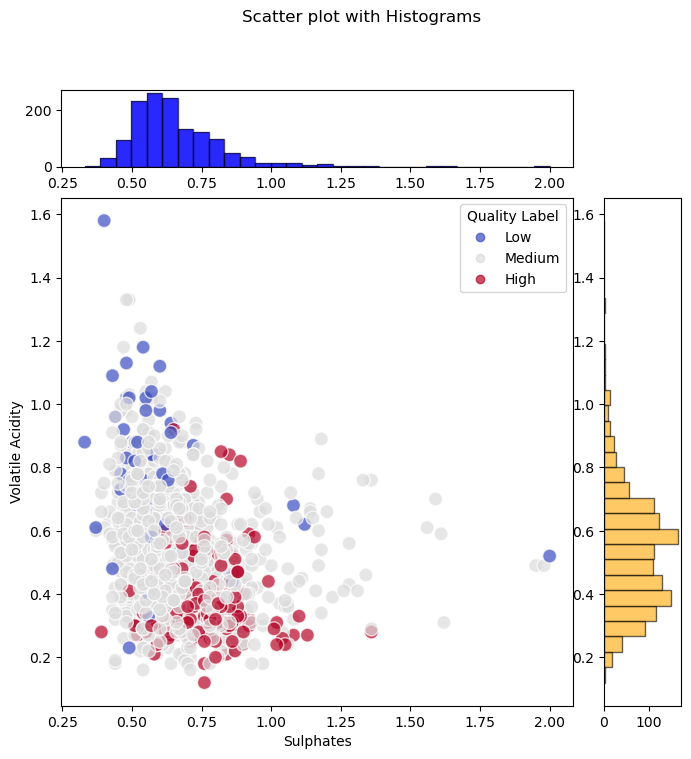

In [8]:
# Tạo một figure và axes
fig = plt.figure(figsize=(8, 8))
grid = plt.GridSpec(6, 6, hspace=0.4, wspace=0.4)

# Mapping quality_label to numerical values
quality_label_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
data['quality_label_num'] = data['quality_label'].map(quality_label_mapping)

# Vẽ scatter plot chính
ax_main = fig.add_subplot(grid[1:, :-1])
scatter = ax_main.scatter(data['sulphates'], data['volatile acidity'], alpha=0.7, 
                          c=data['quality_label_num'], cmap='coolwarm', edgecolors='w', s=100)
ax_main.set(xlabel='Sulphates', ylabel='Volatile Acidity')
handles, labels = scatter.legend_elements()
labels = ['Low', 'Medium', 'High']
ax_main.legend(handles, labels, loc='upper right', title='Quality Label')

# Vẽ histogram cho mỗi trục phụ
# Histogram cho sulphates
ax_hist_x = fig.add_subplot(grid[0, :-1], sharex=ax_main)
n, bins, patches = ax_hist_x.hist(data['sulphates'], bins=30, color='blue', alpha=0.6)
ax_hist_x.hist(data['sulphates'], bins=30, color='blue', alpha=0.6, edgecolor='black')

# Histogram cho volatile acidity
ax_hist_y = fig.add_subplot(grid[1:, -1], sharey=ax_main)
ax_hist_y.hist(data['volatile acidity'], bins=30, color='orange', alpha=0.6, orientation='horizontal', edgecolor='black')

# Hiển thị biểu đồ
plt.suptitle('Scatter plot with Histograms')
plt.show()


**Nhận xét**:

- **Mối quan hệ Sulphates và Volatile Acidity:**
   - **Tương quan âm nhẹ:** Khi sulphates tăng, volatile acidity giảm.
   - Rượu vang thường có sulphates từ **0.5-1.0** và volatile acidity từ **0.2-0.8**.

- **Ảnh hưởng đến chất lượng rượu:**
   - **Chất lượng cao:** Sulphates cao (**0.6-1.0**) và volatile acidity thấp (**0.2-0.4**).
   - **Chất lượng thấp:** Volatile acidity cao (trên **0.8**) bất kể sulphates.
   - **Chất lượng trung bình:** Sulphates từ **0.5-1.0**, volatile acidity từ **0.4-0.8**.

- **Phân phối:**
   - **Sulphates:** Phân bố lệch phải, tập trung ở **0.5-1.0**.
   - **Volatile Acidity:** Lệch phải, chủ yếu từ **0.2-0.8**, ít mẫu vượt **1.0**.

#### Phân tích mối quan hệ của 'Sulphates' và 'Violate acidity' đối với chất lượng rượu vang

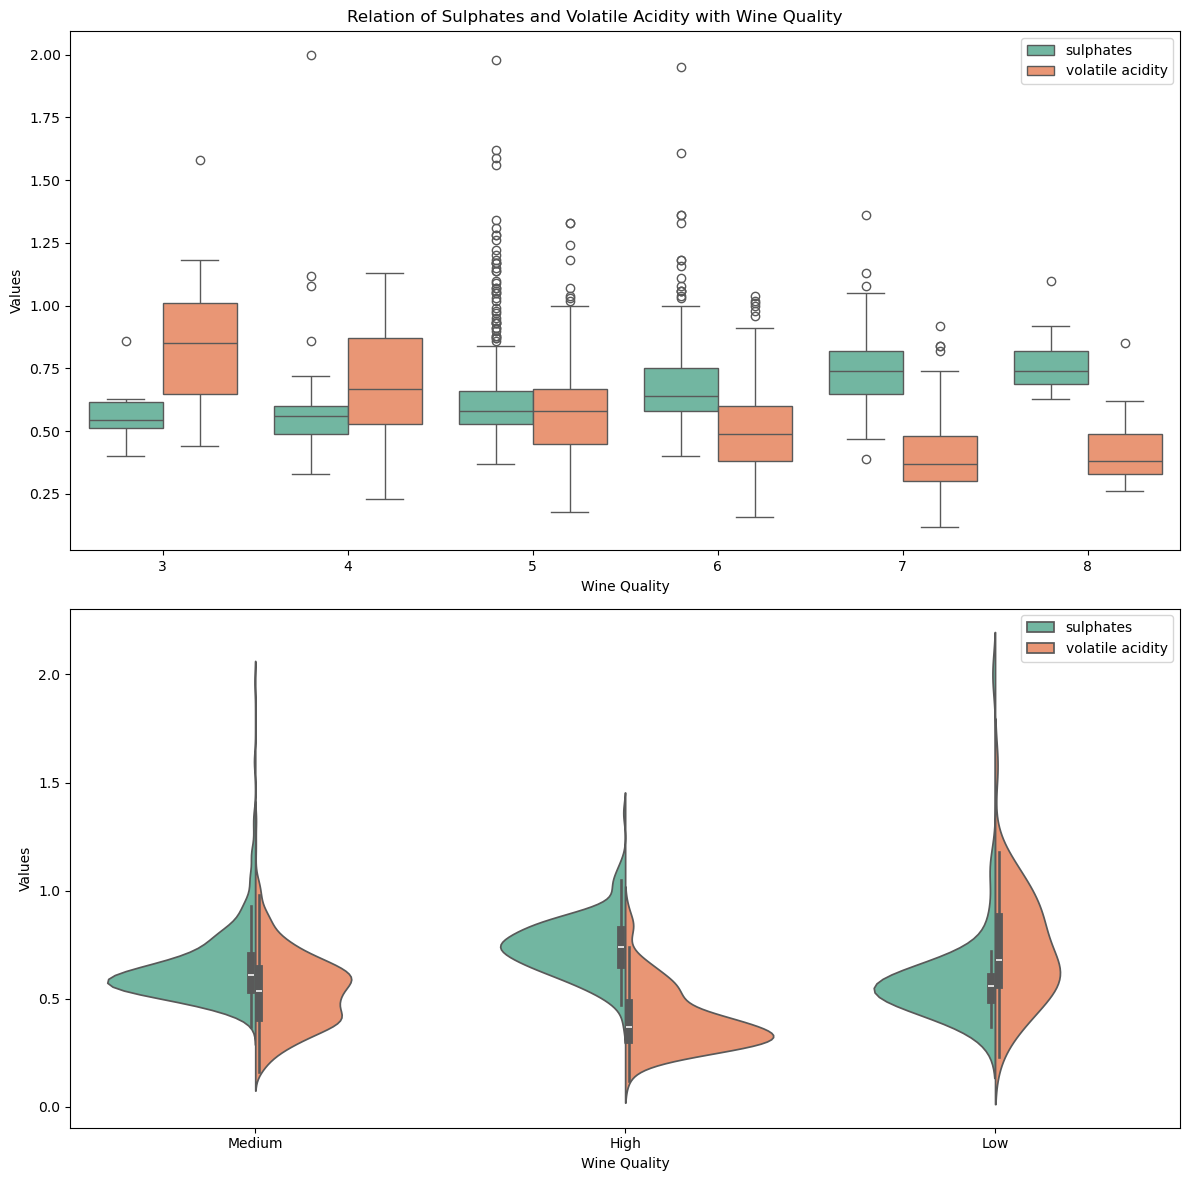

In [9]:
# Vẽ 2 biểu đồ boxplot, violin cho 'sulphates' và 'volatile acidity'
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Vẽ boxplot
data_melted = pd.melt(data, id_vars=['quality'], value_vars=['sulphates', 'volatile acidity'],
                        var_name='Attribute', value_name='Value')
sns.boxplot(x='quality', y='Value', hue='Attribute', data=data_melted, palette='Set2', ax=ax[0])
ax[0].legend()
ax[0].set_xlabel('Wine Quality')
ax[0].set_ylabel('Values')

# Vẽ violin plot
data_melted = pd.melt(data, id_vars=['quality_label'], value_vars=['sulphates', 'volatile acidity'],
                        var_name='Attribute', value_name='Value')
sns.violinplot(x='quality_label', y='Value', hue='Attribute', data=data_melted, split=True, palette='Set2', ax=ax[1])
ax[1].legend()
ax[1].set_xlabel('Wine Quality')
ax[1].set_ylabel('Values')

plt.suptitle('Relation of Sulphates and Volatile Acidity with Wine Quality')
plt.tight_layout()
plt.show()

**Nhận xét:**

- **Sulphates tăng → Chất lượng tăng:** Hàm lượng **Sulphates** cao hơn gắn với chất lượng rượu cao, đặc biệt ở nhóm chất lượng từ 7-8.  
- **Volatile Acidity giảm → Chất lượng tăng:** Hàm lượng **Volatile Acidity** thấp hơn tương ứng với chất lượng rượu cao.  
- **Chất lượng thấp (3-4):**
  - **Sulphates**: Giá trị thấp, tập trung quanh 0.5.  
  - **Volatile Acidity**: Cao, thường trên 0.75.  
- **Chất lượng trung bình (5-6):**
  - **Sulphates**: Tăng dần khi chất lượng rượu cải thiện.  
  - **Volatile Acidity**: Giảm dần khi chất lượng tăng.  
- **Chất lượng cao (7-8):**
  - **Sulphates**: Cao hơn rõ rệt so với rượu chất lượng thấp.  
  - **Volatile Acidity**: Thấp nhất trong các nhóm chất lượng.  

**Kết luận:**
- **Sulphates:** Có tác động tích cực đến chất lượng rượu.  
- **Volatile Acidity:** Có tác động tiêu cực đến chất lượng rượu.  
- **Tương tác:** Sự kết hợp giữa **Sulphates** cao và **Volatile Acidity** thấp là yếu tố quan trọng để đạt chất lượng rượu tốt.  

#### Phân tích hồi quy giữa **Sulphates** và **Volatile Acidity** đối với **Quality**

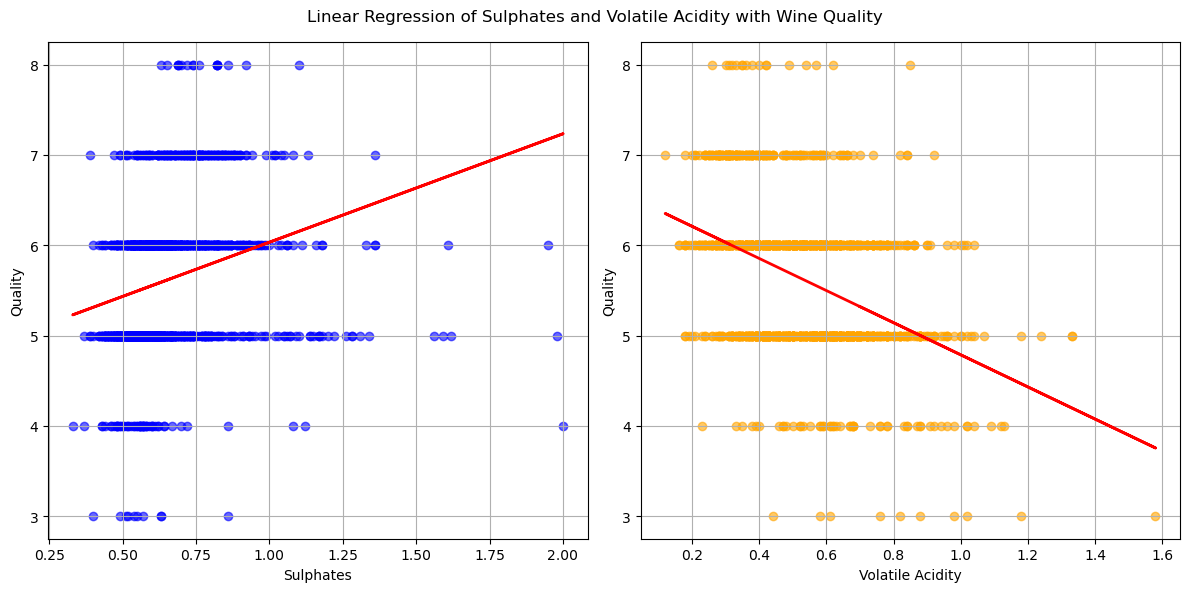

In [10]:
# Dữ liệu
x1 = data['sulphates']
y1 = data['quality']
x2 = data['volatile acidity']
y2 = data['quality']

# Hàm tính toán slope và intercept
def linear_regression(x, y):
    # Trung bình của x và y
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    # Tính slope
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)
    slope = numerator / denominator
    
    # Tính intercept
    intercept = y_mean - slope * x_mean
    
    return slope, intercept

# Tính toán hồi quy cho sulphates
slope1, intercept1 = linear_regression(x1, y1)
line1 = slope1 * np.array(x1) + intercept1

# Tính toán hồi quy cho volatile acidity
slope2, intercept2 = linear_regression(x2, y2)
line2 = slope2 * np.array(x2) + intercept2

# Vẽ 2 biểu đồ scatter plot với đường hồi quy
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot cho sulphates
ax[0].scatter(x1, y1, color='blue', alpha=0.6)
ax[0].plot(x1, line1, color='red', linewidth=2)
ax[0].set(xlabel='Sulphates', ylabel='Quality')
ax[0].grid(True)

# Scatter plot cho volatile acidity
ax[1].scatter(x2, y2, color='orange', alpha=0.6)
ax[1].plot(x2, line2, color='red', linewidth=2)
ax[1].set(xlabel='Volatile Acidity', ylabel='Quality')
ax[1].grid(True)

plt.suptitle('Linear Regression of Sulphates and Volatile Acidity with Wine Quality')
plt.tight_layout()
plt.show()

**Nhận xét:**
- **Sulphates:** Tăng nồng độ sulphates có mối quan hệ **tích cực** với chất lượng rượu vang. Sulphates cao hơn thường đi kèm với điểm chất lượng cao hơn.
- **Volatile Acidity:** Tăng tỷ lệ volatile acidity có mối quan hệ **tiêu cực** với chất lượng rượu. Axit bay hơi cao hơn làm giảm chất lượng rượu.

### Kết luận tổng quát:
- **Mối quan hệ Sulphates và Volatile Acidity:**
  Sulphates và volatile acidity có mối tương quan yếu và âm (**-0.26**), cho thấy khi sulphates tăng, volatile acidity có xu hướng giảm nhẹ. Tuy nhiên, mối quan hệ này không đủ mạnh để khẳng định sự phụ thuộc chặt chẽ giữa hai yếu tố.

- **Ảnh hưởng đến hương vị và chất lượng rượu:**
  - **Sulphates:** Có ảnh hưởng tích cực đến chất lượng rượu. Hàm lượng sulphates cao hơn thường giúp rượu có cấu trúc và hương vị cân bằng hơn, đặc biệt là ở nhóm chất lượng cao (7-8).
  - **Volatile Acidity:** Ảnh hưởng tiêu cực đến chất lượng rượu. Tỷ lệ axit bay hơi cao thường tạo ra vị gắt hoặc chua, làm giảm sự hài hòa của rượu, thường xuất hiện ở nhóm chất lượng thấp (3-4).

- **Tương tác giữa hai yếu tố:**  
Sự kết hợp giữa **sulphates cao** và **volatile acidity thấp** là lý tưởng để đạt chất lượng rượu tốt, góp phần cân bằng hương vị và nâng cao giá trị cảm quan của rượu vang.

## Câu hỏi 2: Citric acid có phải là yếu tố quan trọng trong việc xác định chất lượng rượu vang không?

### Mục đích của việc trả lời câu hỏi
Mục đích của việc trả lời câu hỏi này là để hiểu tác động của citric acid đối với hương vị và chất lượng rượu vang, xác định vai trò của nó trong quá trình sản xuất và đánh giá chất lượng sản phẩm. Việc này cũng giúp cung cấp cơ sở dữ liệu cho các nghiên cứu và báo cáo về chất lượng rượu vang, đồng thời hỗ trợ quyết định trong việc điều chỉnh lượng citric acid để cải thiện chất lượng sản phẩm. Cuối cùng, việc trả lời câu hỏi còn giúp dự đoán chất lượng rượu dựa trên mức độ citric acid có trong rượu.

### Lý chọn chọn **Acid Citric**
Chọn **acid citric** để phân tích vì nó có thể ảnh hưởng đến hương vị và chất lượng rượu vang. Các yếu tố như **fixed acidity** và **volatile acidity** đã được chứng minh có mối tương quan cao với chất lượng rượu, nhưng chưa rõ **citric acid** có vai trò quan trọng như vậy không. Vì vậy, cần phân tích mức độ ảnh hưởng của citric acid để xác định vai trò của nó trong việc đánh giá chất lượng, từ đó giúp chọn đặc trưng phù hợp để dự đoán chất lượng rượu vang.

### Các bước thực hiện

#### Phân tích sự phân bổ giữa **citric acid** và **quality** 
**Các bước phân tích sự phân bổ:**

1. **Mục tiêu**: Xem mối quan hệ và sự phân bố giữa **citric acid** và **quality**.

2. **Biểu đồ phân tán**: Vẽ **scatter plot** với citric acid trên trục X và quality trên trục Y.

3. **Quan sát xu hướng**:
   - Kiểm tra xem dữ liệu có tập trung quanh một xu hướng hay phân tán ngẫu nhiên.
   - Quan sát mối quan hệ giữa mức citric acid cao/thấp với chất lượng.

4. **Đánh giá đường hồi quy**:
   - Vẽ đường hồi quy trên biểu đồ.
   - Độ dốc nhỏ → mối quan hệ yếu, phân tán rộng → ít tương quan.

5. **Kết luận**: 
   - Dữ liệu phân tán rộng, đường hồi quy dốc nhỏ → **citric acid có mối quan hệ yếu với quality**.

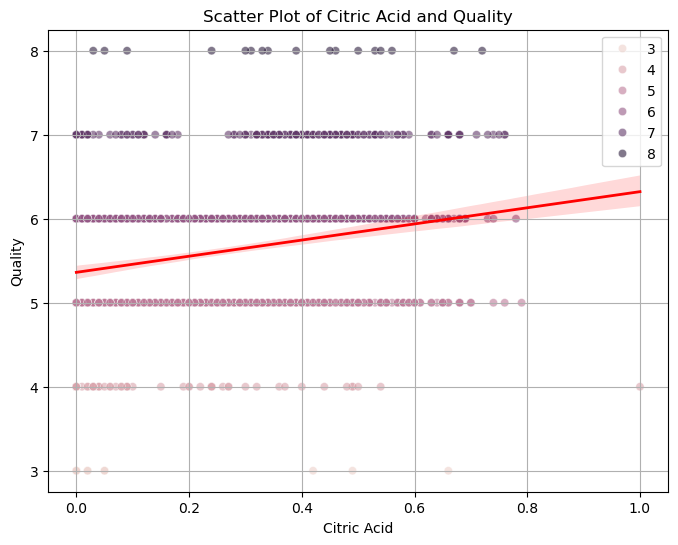

In [11]:
# Vẽ biểu đồ phân tán
plt.figure(figsize=(8, 6))
sns.scatterplot(x='citric acid', y='quality', hue='quality', data=data, color='blue', alpha=0.6)

# Vẽ đường hồi quy tuyến tính
sns.regplot(x='citric acid', y='quality', data=data, scatter=False, color='red', line_kws={'linewidth': 2}) 

# Thêm tiêu đề và nhãn
plt.title("Scatter Plot of Citric Acid and Quality")
plt.xlabel("Citric Acid")
plt.ylabel("Quality")
plt.legend()
plt.grid(True)

# Hiển thị biểu đồ
plt.show()

**Nhận xét:**
- **Mối quan hệ yếu**: Citric acid có ảnh hưởng rất nhỏ đến quality, thể hiện qua đường hồi quy có độ dốc thấp.
- **Phân tán rộng**: Dữ liệu phân tán không theo xu hướng rõ ràng.
- **Chất lượng tập trung**: Quality chủ yếu tập trung ở mức 5, 6, 7, bất kể giá trị citric acid.  
- **Kết luận**: Citric acid không phải yếu tố chính ảnh hưởng đến chất lượng rượu vang.

#### Phân tích hồi quy

**Các bước thực hiện phân tích hồi quy:**

- Bước 1: Kiểm tra xem **citric acid** có ảnh hưởng đáng kể và ý nghĩa thống kê đến **chất lượng rượu vang** (quality) hay không.

- Bước 2: **Chuẩn bị dữ liệu**: 
   - Chọn biến độc lập (**citric acid**) và biến phụ thuộc (**quality**).
   - Làm sạch dữ liệu và kiểm tra phân bố.

- Bước 3: **Xây dựng mô hình**: 
   - Sử dụng hồi quy tuyến tính để kiểm tra mối quan hệ.

- Bước 4: **Đánh giá mô hình**: 
   - **R-squared (R²)**: Cho biết citric acid giải thích được bao nhiêu % sự biến động của chất lượng rượu.
   - **Hệ số hồi quy (coef)**: Mức độ ảnh hưởng của citric acid đến quality.
   - **P-value**: Xác định ý nghĩa thống kê của citric acid (nhỏ hơn 0.05 là có ý nghĩa).

- Bước 5: **Trực quan hóa**: Vẽ biểu đồ phân tán với đường hồi quy để minh họa mối quan hệ.

- Bước 6: **Kết luận**.

Intercept: 5.384282469776631
Coefficient: 0.9232696760226291
Mean Squared Error: 0.67
R^2: 0.06


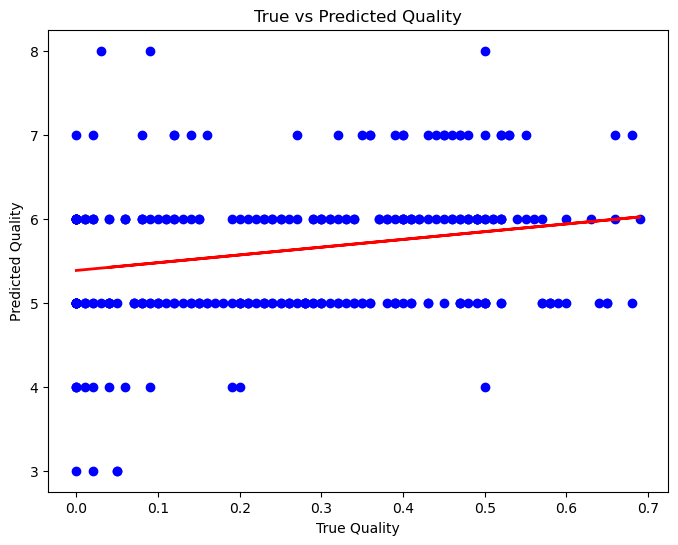

In [12]:
# Lựa chọn các biến độc lập và phụ thuộc
X = data[['citric acid']] # Độc lập
y = data['quality'] # Phụ thuộc

# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán trên tâp kiểm thử
y_pred = model.predict(X_test)

# In ra các hệ số của mô hình
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_[0]}')

# Đánh giá độ chính xác của mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2: {r2:.2f}')

# Vẽ đồ thị phân tán giữa giá trị thực và giá trị dự đoán
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('True Quality')
plt.ylabel('Predicted Quality')
plt.title('True vs Predicted Quality')
plt.show()

Với kết quả trên, có thể rút ra các kết luận như sau:

- **Hệ số hồi quy** cho thấy **citric acid** có ảnh hưởng đến chất lượng rượu vang (mỗi đơn vị citric acid làm tăng 0.92 điểm chất lượng).
- **R² = 0.06** chỉ ra rằng citric acid chỉ giải thích 6% sự biến động của chất lượng rượu, cho thấy mức độ ảnh hưởng rất nhỏ.
- **MSE = 0.67** cho thấy mô hình dự đoán có độ lệch khá lớn.

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     55.40
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           2.00e-13
Time:                        15:09:13   Log-Likelihood:                -1297.0
No. Observations:                1087   AIC:                             2598.
Df Residuals:                    1085   BIC:                             2608.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.3843      0.042    129.219      

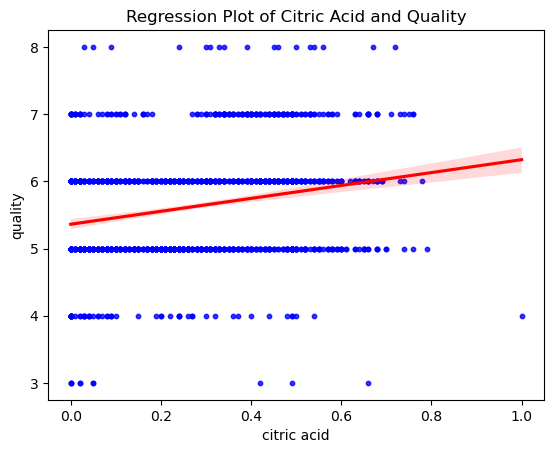

In [13]:
# Thêm hằng số vào mô hình (intercept)
X_train_with_const = sm.add_constant(X_train)

# Xây dựng mô hình hồi quy tuyến tính
model = sm.OLS(y_train, X_train_with_const).fit()

# In ra summary của mô hình
print(model.summary())

# Vẽ đồ thị hồi quy tuyến tính
sns.regplot(x='citric acid', y='quality', data=data, color='blue', scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Regression Plot of Citric Acid and Quality')
plt.show()

Dựa trên kết quả phân tích hồi quy và biểu đồ:
- **Biểu đồ hồi quy**: Đường hồi quy có độ dốc nhỏ, và các điểm dữ liệu phân tán rộng, cho thấy mối quan hệ giữa citric acid và chất lượng rượu rất yếu.

- **Kết luận:**
Citric acid có ảnh hưởng nhỏ và có ý nghĩa thống kê đến chất lượng rượu, nhưng mức độ tác động không cao và không phải yếu tố quyết định chính. Nên xem xét thêm các yếu tố khác để cải thiện mô hình dự đoán.

### Kết luận tổng quát:
Citric acid không phải là yếu tố có ảnh hưởng mạnh hoặc đóng vai trò quyết định trong việc đánh giá chất lượng rượu vang. Mặc dù nó có mối quan hệ nhất định với chất lượng, nhưng mức độ tác động rất nhỏ và không đủ để coi là đặc trưng chính khi lựa chọn các yếu tố quan trọng để dự đoán hoặc đánh giá chất lượng rượu vang một cách chính xác.